<a href="https://colab.research.google.com/github/dream2globe/hands-on-machine-learning-2nd/blob/master/ch4_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4. 모델 훈련

## 4.1 선형 회귀

### 4.1.1 정규방정식

+ 데이터 만들기

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

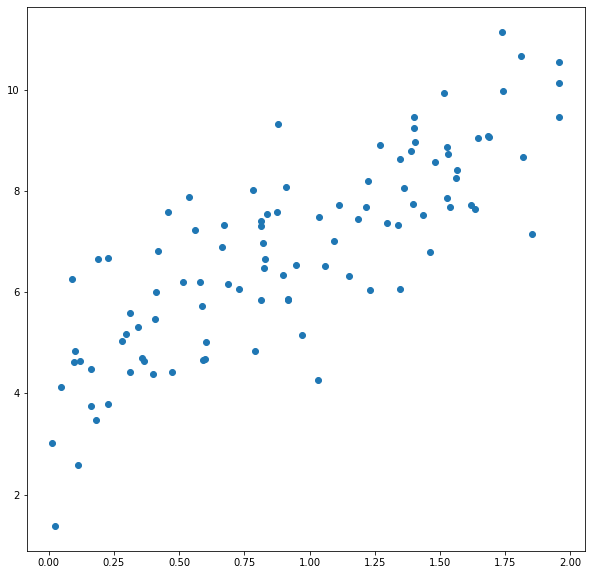

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X, y)

* 비용함수 (이후 $MSE(X, h_\theta)$ 는 $MSE(\theta)$ 로 간단하게 표기)
$$ MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^m (\theta^T \text{x}^{(i)} - y^{(i)})\text{x}_j^{(i)}$$

* 정규 방정식을 이용한 Θ 구하기
$$\hat{\theta} = (X^TX)^{-1}X^Ty$$ 

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 X0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best # 4, 3과는 다소 오류가 있음

array([[4.1720249 ],
       [2.84108116]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.1720249 ],
       [9.85418722]])

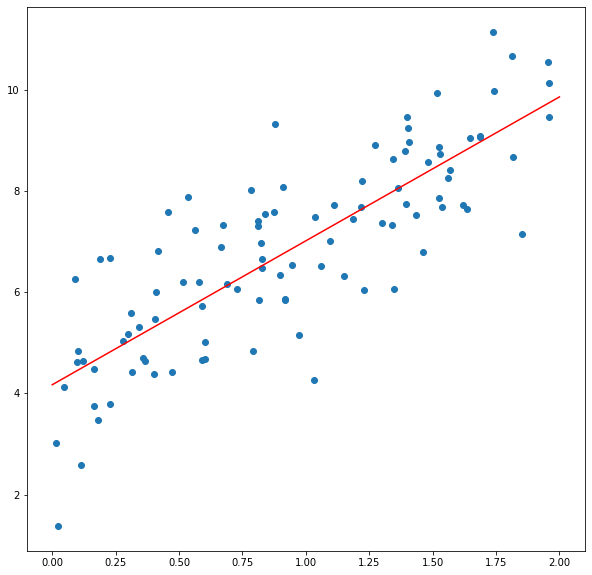

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(X_new, y_predict, "r-")
ax.scatter(X, y)
plt.show()

+ 사이킷런은 scipy.linalg.lstsq() 함수를 기반으로 유사역행렬(pseudo)을 구함
+ X+는 무어 로펜로즈 역행렬
    $$\hat{\theta} = X^++y$$ 

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.1720249]), array([[2.84108116]]))

### 4.1.2 계산 복잡도
* Feature의 수
    * 정규방정식: $O(n^{2.4}) ~ O(n^{3})$
    * SVD: $O(n^{2})$
* 데이터의 수
    * 모두 $O(n)$

### 4.2.1 배치 경사 하강법
* 파라미터 $\theta_j$ 에 대한 편도함수
$$\frac{\partial}{\partial \theta_j}MES(\theta) = \frac{2}{m}\sum_{i=1}^m (\theta^T \text{x}^{(i)} - y^{(i)})\text{x}_j^{(i)}$$

* 비용 함수의 그레이디언트 벡트
$$ \triangledown_{\theta} MES = \frac{2}{m}X^T(X^{\theta}-y)$$

* 경사 하강법의 스텝
$$ \theta^\text{ next step} = - \eta \triangledown_{\theta} MES(\theta)$$

In [ ]:
eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration % 10 == 0:
        print(theta)

[[ 2.90980305]
 [-0.15603559]]
[[4.75496757]
 [2.28482493]]
[[4.61142853]
 [2.43940577]]
[[4.49680133]
 [2.54428876]]
[[4.41204116]
 [2.62174622]]
[[4.34940149]
 [2.67898845]]
[[4.30310958]
 [2.72129156]]
[[4.26889898]
 [2.75255436]]
[[4.24361669]
 [2.77565817]]
[[4.2249326 ]
 [2.79273232]]


* 수렴률
    * $\epsilon$ 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O(\frac{1}{\epsilon})$ 즉 오차를 1/10로 줄이면 반복이 10배 늘어날 수 있음

### 4.2.2 확률적 경사 하강법
* 매 스텝에서 한 개의 샘플을 무작위로 선태가고 하나의 샘플에 대한 그레이디언트를 계산
    * 지역 최솟값은 건너갈 수 있으나, 전역 최솟값에 안착하기에는 불안할 수 있음
* 매 반복에서 학습률을 결정하는 학습 스케줄을 이용하여 점진적으로 학습률을 낮추면 개선할 수 있음

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
lrs = list()

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        lrs.append(eta)
        theta = theta - eta * gradients

print(theta)

[[4.21293734]
 [2.82656642]]


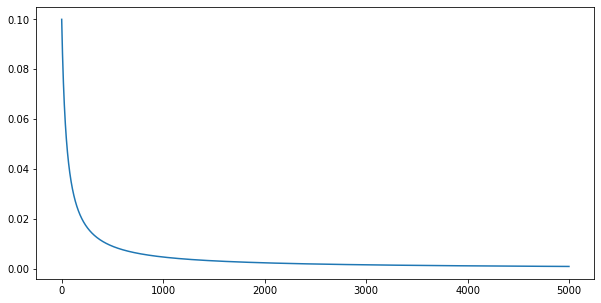

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) # learning schedule
ax.plot(lrs)

* 사이킷런의 사용

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10673891]), array([2.80162129]))

### 4.2.3 미니배치 경사 하강법

+ 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산
+ 미니배치를 어느 정도 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임 

## 4.3 다항 회귀

In [ ]:
m = 100

X = 6 * np.random.rand(m, 1) - 3 # range (-3, 3)
X = X[np.argsort(X, axis=0)].reshape(-1, 1) # 순서를 x 크기로 조절
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

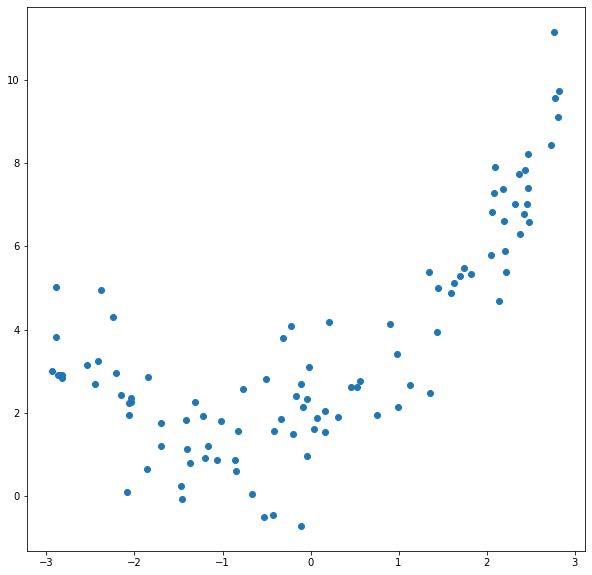

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X, y)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures(degree=d)는 특성이 n개인 배열을 특성이 (n+d)! / d!n! 개인 배열로 변환
poly_features = PolynomialFeatures(degree=2, include_bias=False) # interaction_only=True
X_poly = poly_features.fit_transform(X)

poly_features.get_feature_names()

['x0', 'x0^2']

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ # 2, 2, 0.5와 유사한 수준

(array([1.79879185]), array([[0.99638401, 0.56522497]]))

* m이 1, 2, 300 인 경우

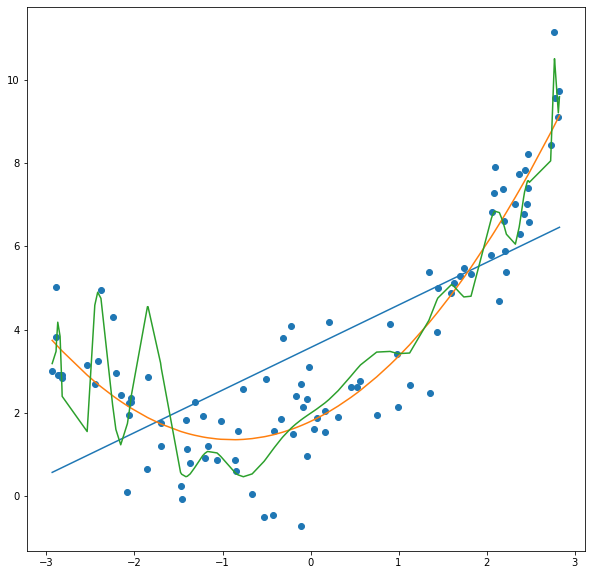

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X, y)

# 오버피팅과 언더피팅 비교
for m in [1, 2, 30]:
    poly_features = PolynomialFeatures(degree=m, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(X_poly)

    ax.plot(X, y_pred)

plt.show()

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3 # range (-3, 3)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 데이터가 추가될 때 마다 error rate를 참고하는 방법
def plot_learning_curves(model, X, y, ax):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)       
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    ax.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
    ax.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validaition set")
    ax.set_ylim(0, 4)
    ax.legend()

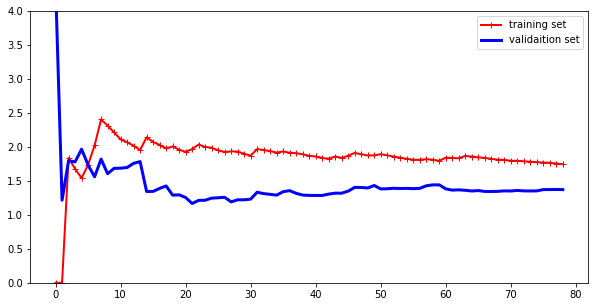

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, ax)

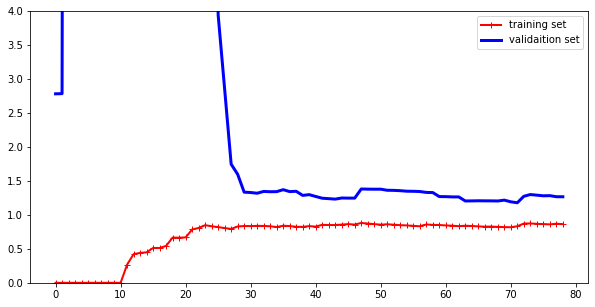

In [ ]:
from sklearn.pipeline import Pipeline

fig, ax = plt.subplots(figsize=(10, 5))

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=True)),
    ("lin_reg", LinearRegression())                          
])

plot_learning_curves(polynomial_regression, X, y, ax)

* 편향/분산 트레이드 오프
    * 편향: 잘못된 가정에 인한 것으로 실제로는 2차인데 선형으로 가정하는 경우(과소 적합)
    * 분산: 자유도가 높은 모델에 훈련 데이터에 과대적합되는 경향
    * 줄일 수 없는 오차: 데이터 자체에 있는 잡음

## 4.5 규제가 있는 선형모델

### 4.5.1 릿지 회귀

* 릿지 회귀의 비용 함수

$$ J(\theta) = MES(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2 $$

* 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요함

* 릿지 회귀의 정규방정식 (A는 단위행렬)
$$ \hat{\theta} = (X^TX+\alpha A)^{-1}X^{T}\text{y} $$  

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky') # solver의 종류: sag(SGD 유사), saga(sag 개선 버전) 등
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.19992558]])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.19241572])

### 4.5.2 라쏘 회귀

* 중요하지 않은 특성의 가중치를 제거하는 특징

$$ J(\theta) = MES(\theta) + \alpha \sum_{i=1}^{n} \left\vert \theta_i \right\vert $$ 

* 라쏘를 사용할 때 경사 하강법이 최적점 근처에서 진동하는 것을 받으려면 점진적으로 학습률을 감소해야 함

* $ \theta_i=0 \text{(i=1, 2, ..., n 일 때)}$ 에서 미분 가능하지 않지만 subgradient vector를 사용하면 경사 하강법을 적용하는 데 문제가 없음  

In [ ]:
# Lasso를 구현하는 1/2가지 방식
from sklearn.linear_model import Lasso
lasso_reg = Ridge(alpha=1, solver='cholesky')
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([[5.19992558]])

In [ ]:
# Lasso를 구현하는 2/2가지 방식
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.19956474])

### 4.5.3 엘라스틱넷

* L1과 L2를 동시에 사용

$$ J(\theta) = MES(\theta) + r\alpha \sum_{i=1}^{n} \left\vert \theta_i \right\vert + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2 $$

* 특성 수가 훈련 샘플 수보다 많으면 라쏘는 특성 수 만큼만 중요한 변수를 선택하거나, 여러 특성이 강하게 연관되어 있으면 이들 중 임의의 특성 하나를 선택하는 문제로 라쏘보다는 엘라스틱넷을 선호함 

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_reg.fit(X, y)
elasticnet_reg.predict([[1.5]])

array([5.15691098])

## 4.5.4 조기 종료

* 검증 에러가 최솟값에 도달하면 바로 훈련을 중지하는 방법으로 구현이 쉬워 제프리 힌턴은 '훌륭한 공짜 점심'이라고 부름

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_feature", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

In [ ]:
val_error_lst = []
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # 훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val.ravel(), y_val_predict.ravel())
    val_error_lst.append(val_error)
    if val_error < minimum_val_error: # val이 높아지면 바로 멈춤
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## 4.6 로지스틱 회귀

### 4.6.1 확률 추정
* 로지스틱 회귀 모델의 확률 추정(백터 표현식)
$$ \hat{p} = h_{\theta}(\text{x}) = \sigma(\theta^T\text{x}) = \frac{1}{1+exp^{\theta^T\text{x}}} $$ 

* $\theta^T\text{x} = t$ 를 logit, log-odds(양성 클래스 추정 확률과 음성 클래스 추정 확률 사이의 로그 비율)라고도 부름

* 비용함수 

$$ c(\theta)=
\begin{cases}
-log(\hat{p}), & \mbox{if }y=1 \\
-log(1-\hat{p}), & \mbox{if }y=0
\end{cases} $$

* 로지스틱 회귀의 비용 함수(로그 손실)

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} y^{(i)} log(\hat{p}) + (1-y^{(i)}) log(1-\hat{p})$$

* 로지스틱 비용 함수의 편도함수

$$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m (\sigma(\theta^T \text{x}^{(i)}) - y^{(i)})\text{x}_j^{(i)}$$

### 4.6.3 결정 경계
* 꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

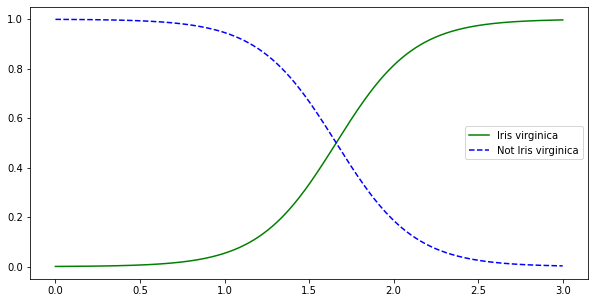

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
ax.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
ax.legend()

plt.show()

### 4.6.4 소프트맥스 회귀

* 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화한 것을 소프트맥스 혹은 다항 로지스틱 회귀라고 함

* 클래스 k 에 대한 소프트맥스 점수
$$ s_k(\text{x}) = (\theta^{(k)})^{T} \text{x} $$

* 소프트맥스 함수
$$ \hat{p_k} = \sigma(s(\text{x}))_k = \frac{exp(s_k(\text{x}))}{\sum_{j=1}^{K}exp(s_k(\text{x}))} $$

* 소프트맥스 회귀 분류기의 예측
$$ \hat{\text{y}} = argmax_k \text{ } \sigma(s(\text{x}))_k $$